# 1. Import the Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import gc
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
import matplotlib.pyplot as plt

# 2. Load the Data

In [2]:
with open('../input/anime-data-preprocessing/data_xgb.pickle', 'rb') as f:
    data = pickle.load(f)
# with open('../input/anime-data-preprocessing/frequency_matrix.pickle', 'rb') as f:
#     genres = pickle.load(f)    
# with open('../input/anime-data-preprocessing/sypnopsis_vector_tf_idf.pickle', 'rb') as f:
#     sypnopsis = pickle.load(f)

In [3]:
data[0]

,Episodes,Ranked,N_votes,rating_reliability,expected_reliability,date,duration,x0_Movie,x0_ONA,x0_OVA,...,91,92,93,94,95,96,97,98,99,score_by_user_4773
anime_id,,,,,,,,,,,,,,,,,,,,,
1,26,28.0,641705,0.362532,0.516247,1998.4,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.219417,0.000000,0.000000,8.0
5,1,159.0,160349,0.092112,0.106516,2001.9,115.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8.0
6,26,266.0,286146,0.165325,0.225272,1998.4,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8.0
7,26,2481.0,39094,0.023165,0.039668,2002.7,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.294035,0.0,0.250298,0.000000,0.000000,7.0
8,52,3710.0,5923,0.003675,0.007708,2004.9,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.228532,0.438215,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44070,1,558.0,478,0.000301,0.006174,2021.2,22.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.0
44087,2,77.0,3727,0.002159,0.011056,2021.1,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,7.0
44236,1,8634.0,590,0.000425,0.005962,2021.1,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.0


In [4]:
real_data = []
for i in data[:]:
    if len(i) > 5000 : real_data.append(i)
len(real_data)

20

In [5]:
del data
gc.collect()

40

In [6]:
real_data[0]

,Episodes,Ranked,N_votes,rating_reliability,expected_reliability,date,duration,x0_Movie,x0_ONA,x0_OVA,...,91,92,93,94,95,96,97,98,99,score_by_user_10255
anime_id,,,,,,,,,,,,,,,,,,,,,
1,26,28.0,641705,0.362532,0.516247,1998.4,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.219417,0.000000,0.000000,10.0
5,1,159.0,160349,0.092112,0.106516,2001.9,115.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.0
6,26,266.0,286146,0.165325,0.225272,1998.4,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.0
7,26,2481.0,39094,0.023165,0.039668,2002.7,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.294035,0.000000,0.250298,0.000000,0.000000,8.0
8,52,3710.0,5923,0.003675,0.007708,2004.9,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.228532,0.438215,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45615,1,13783.0,32,0.000022,0.009908,2007.7,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
45616,1,12772.0,31,0.000021,0.009912,2007.7,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
45753,1,5669.0,8016,0.005796,0.009511,2021.1,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


# 3. XGB

In [7]:
# !pip --quiet install ../input/treelite/treelite-0.93-py3-none-manylinux2010_x86_64.whl
# !pip --quiet install ../input/treelite/treelite_runtime-0.93-py3-none-manylinux2010_x86_64.whl
# import treelite
# import treelite_runtime
# from treelite_runtime import Predictor, Batch

In [8]:
import xgboost as xgb

In [9]:
result = {}

In [10]:
# def metric(true, pred):
#     nq.sqrt(mean_squared_error(true, pred))
#     mean_squared_log_error(true, pred)

In [11]:
all_data = pd.DataFrame()
for i in range(len(real_data)):
    real_data[i].Episodes = real_data[i].Episodes.astype('int64')
    user_name = real_data[i].columns.values[-1:][0].split('_')[-1]
    temp = real_data[i].rename( columns = {real_data[i].columns.values[-1:][0] : 'score'}, inplace = False)
    all_data = pd.concat([all_data, temp])
all_data

,Episodes,Ranked,N_votes,rating_reliability,expected_reliability,date,duration,x0_Movie,x0_ONA,x0_OVA,...,91,92,93,94,95,96,97,98,99,score
anime_id,,,,,,,,,,,,,,,,,,,,,
1,26,28.0,641705,0.362532,0.516247,1998.4,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.219417,0.000000,0.000000,10.0
5,1,159.0,160349,0.092112,0.106516,2001.9,115.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,10.0
6,26,266.0,286146,0.165325,0.225272,1998.4,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,8.0
7,26,2481.0,39094,0.023165,0.039668,2002.7,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.294035,0.0,0.250298,0.000000,0.000000,8.0
8,52,3710.0,5923,0.003675,0.007708,2004.9,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.228532,0.438215,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39451,1,12665.0,8,0.000008,0.009915,1973.0,15.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,8.0
39453,1,12560.0,8,0.000008,0.009902,1973.0,15.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.247103,0.000000,0.0,0.000000,0.000000,0.225278,4.0
39454,1,12982.0,10,0.000009,0.009855,1974.0,13.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.0


In [12]:
X_all = all_data.iloc[:,:-1]
y_all = all_data.iloc[:,-1:]
train_x_all,test_x_all,train_y_all,test_y_all = train_test_split(X_all,y_all, test_size=0.2)

dtrain_all = xgb.DMatrix(train_x_all, label=train_y_all)
dtest_all = xgb.DMatrix(test_x_all, label=test_y_all)

params_all = {
    'n_estimators': 100,
    'max_depth': 24,
    'learning_rate': 0.09905592273886195,
    'subsample': 0.8704369112806065,
    'colsample_bytree': 0.9932309296458037,
    'objective': 'reg:squarederror',
    'gamma': 7,
    "eval_metric" : 'rmse',
    'seed': 2021,
    'tree_method': 'gpu_hist'
    }

bst_all = xgb.train(params_all, dtrain_all, 100, evals = [(dtrain_all, 'train'), (dtest_all, 'eval')])

[07:53:21] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:5.75144	eval-rmse:5.75257
[1]	train-rmse:5.28167	eval-rmse:5.28688
[2]	train-rmse:4.86730	eval-rmse:4.87785
[3]	train-rmse:4.50204	eval-rmse:4.51880
[4]	train-rmse:4.18139	eval-rmse:4.20536
[5]	train-rmse:3.90074	eval-rmse:3.93249
[6]	train-rmse:3.65664	eval-rmse:3.69687
[7]	train-rmse:3.44524	eval-rmse:3.49474
[8]	train-rmse:3.26269	eval-rmse:3.32153
[9]	train-rmse:3.10607	eval-rmse:3.17429
[10]	train-rmse:2.97245	eval-rmse:3.04981
[11]	train-rmse:2.85887	eval-rmse:2.94483
[12]	train-rmse:2.76273	eval-rmse:2.85731
[13]	train-rmse:2.68205	eval-rmse:2.78484
[14]	train-rmse:2.61440	eval-rmse:2.72451
[15]	train-rmse:2.55773	eval-rmse:2.67477
[16]

In [13]:
# xgb.plot_tree(bst)

In [14]:
# xgb.to_graphviz(bst)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

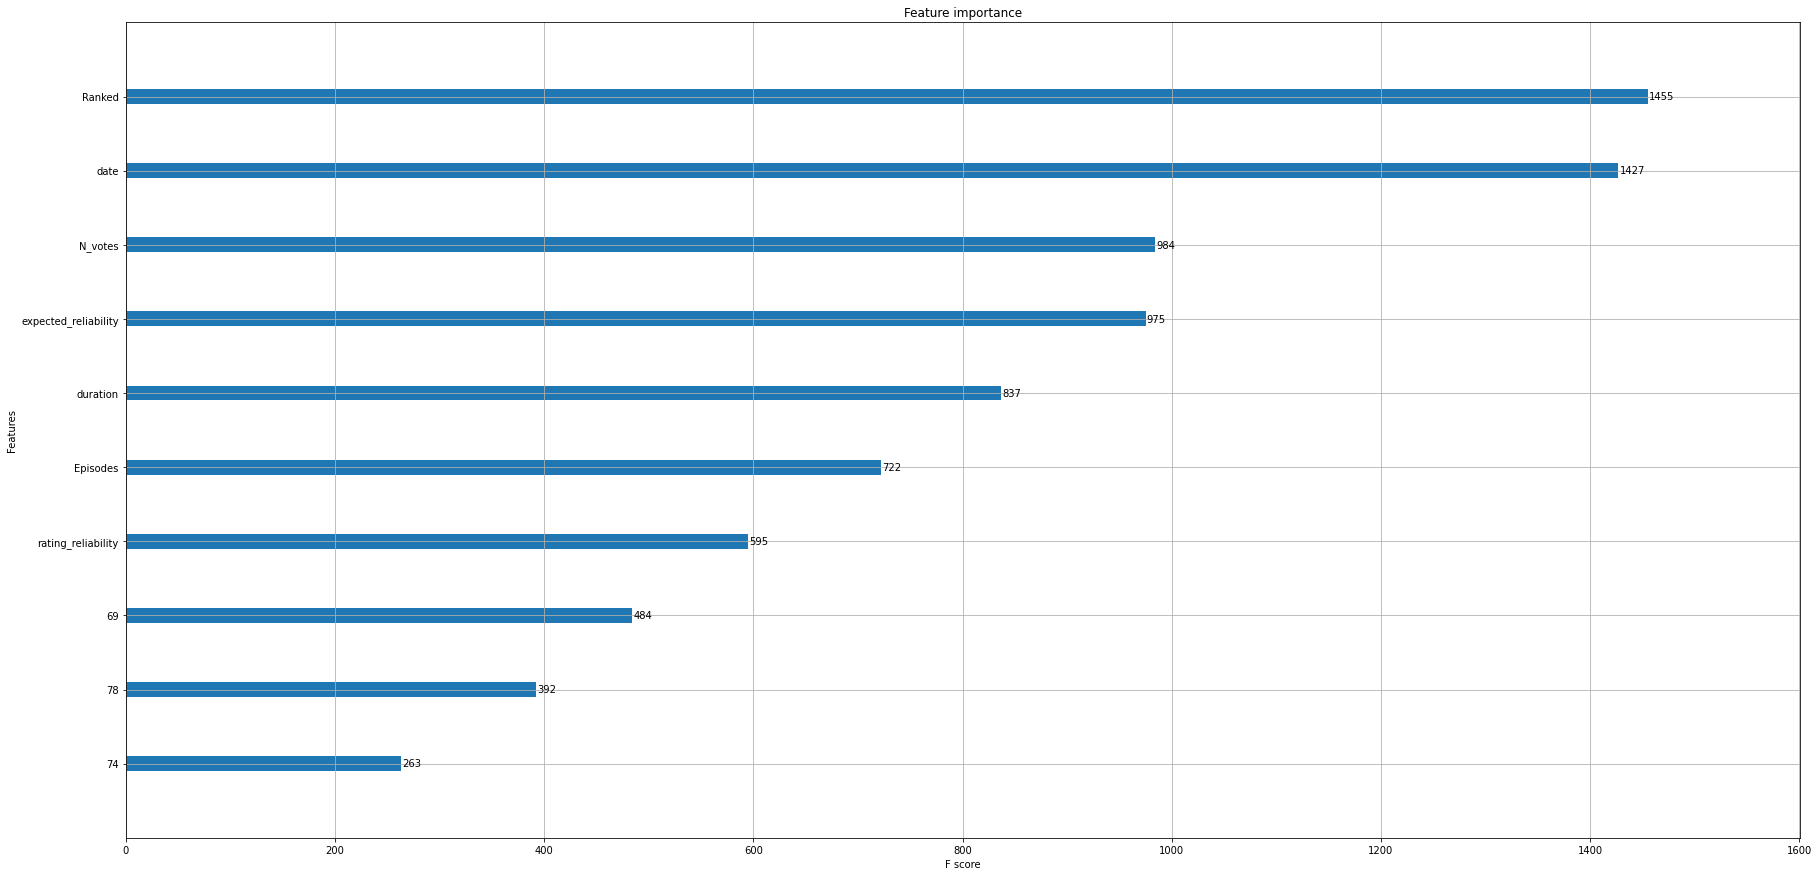

In [15]:
plt.rcParams["figure.figsize"] = (30, 15)
xgb.plot_importance(bst_all,max_num_features=10)

In [16]:
# xgb_pred = bst.predict(dtest)
    
# #xgb_explained_variance_score = explained_variance_score(test_y, xgb_pred)
# xgb_MAE = mean_absolute_error(test_y, xgb_pred)
# xgb_MSE = mean_squared_error(test_y, xgb_pred)
# xgb_RMSE = np.sqrt(mean_squared_error(test_y, xgb_pred))

# print(xgb_MAE, xgb_MSE,xgb_RMSE  )

In [17]:
for i in range(len(real_data)):
    real_data[i].Episodes = real_data[i].Episodes.astype('int64')
    user_name = real_data[i].columns.values[-1:][0].split('_')[-1]
    
    X = real_data[i].iloc[:,:-1]
    y = real_data[i].iloc[:,-1:]
    X = X.astype({'Episodes':'int'})
    train_x,test_x,train_y,test_y = train_test_split(X,y, test_size=0.2)
    
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dtest = xgb.DMatrix(test_x, label=test_y)
    
    
    params = {
        'n_estimators': 100,
        'max_depth': 24,
        'learning_rate': 0.09905592273886195,
        'subsample': 0.8704369112806065,
        'colsample_bytree': 0.9932309296458037,
        'objective': 'reg:squarederror',
        'gamma': 7,
        "eval_metric" : 'rmse',
        'seed': 2021,
        'tree_method': 'gpu_hist'
        }
    
    
    bst = xgb.train(params, dtrain, 100, evals = [(dtrain, 'train'), (dtest, 'eval')])
    
    xgb_pred = bst.predict(dtest)
    
    #xgb_explained_variance_score = explained_variance_score(test_y, xgb_pred)
    xgb_MAE = mean_absolute_error(test_y, xgb_pred)
    xgb_MSE = mean_squared_error(test_y, xgb_pred)
    xgb_RMSE = np.sqrt(mean_squared_error(test_y, xgb_pred))
    #xgb_RMSLE = np.sqrt(mean_squared_log_error(test_y, xgb_pred))
    #xgb_r2_score = r2_score(test_y,xgb_pred)
    
    #result[f'user_{user_name}'] = len(real_data[i]),xgb_explained_variance_score,xgb_r2_score, xgb_MAE, xgb_MSE, xgb_RMSE,xgb_RMSLE
    result[f'user_{user_name}'] = len(real_data[i]),xgb_MAE, xgb_MSE, xgb_RMSE
    
    
    '''
    treelite model
    '''
    
#     model = treelite.Model.from_xgboost(bst)
#     model.export_lib(toolchain='gcc', libpath= f'./mymodel_{i}.so',compiler='failsafe',
#                   params={'parallel_comp': 32}, verbose=True)
#     predictor = treelite_runtime.Predictor('./mymodel.so', verbose=True)
    
#     batch = treelite_runtime.Batch.from_npy2d(test_x.to_numpy())
#     treelite_pred = predictor.predict(batch)
    
#     treelite_explained_variance_score = explained_variance_score(test_y, treelite_pred)
#     treelite_mean_squared_error = mean_squared_error(test_y, treelite_pred)
#     treelite_r2_score = r2_score(test_y,treelite_pred)
    
#     print(treelite_explained_variance_score,treelite_mean_squared_error,treelite_r2_score)
    
    #break
    '''
    add result to dict result
    '''
    #result[f'user_{i}'] = [[xgb_explained_variance_score, xgb_mean_squared_error, xgb_r2_score], [treelite_explained_variance_score, treelite_mean_squared_error, treelite_r2_score]]
    
    

[07:53:37] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:5.47539	eval-rmse:5.50519
[1]	train-rmse:4.97437	eval-rmse:5.02897
[2]	train-rmse:4.52360	eval-rmse:4.59731
[3]	train-rmse:4.11899	eval-rmse:4.21887
[4]	train-rmse:3.75622	eval-rmse:3.88196
[5]	train-rmse:3.42895	eval-rmse:3.58729
[6]	train-rmse:3.13700	eval-rmse:3.32231
[7]	train-rmse:2.87672	eval-rmse:3.08786
[8]	train-rmse:2.64127	eval-rmse:2.87519
[9]	train-rmse:2.43021	eval-rmse:2.69390
[10]	train-rmse:2.24382	eval-rmse:2.53328
[11]	train-rmse:2.07667	eval-rmse:2.39561
[12]	train-rmse:1.92996	eval-rmse:2.27795
[13]	train-rmse:1.79491	eval-rmse:2.17448
[14]	train-rmse:1.68097	eval-rmse:2.08465
[15]	train-rmse:1.57920	eval-rmse:2.00596
[16]

In [18]:
result

{'user_10255': (6109,
  1.2182616576820662,
  2.514098939517984,
  1.5855910379155098),
 'user_38143': (5527,
  0.8730382856796706,
  1.2801357791689414,
  1.1314308547891654),
 'user_57684': (5421,
  0.003045792293988065,
  0.008293454260721086,
  0.09106840429436043),
 'user_64807': (5396,
  1.3392466676455956,
  2.944366269941536,
  1.715915577743129),
 'user_68042': (10005,
  1.7056368404123439,
  4.507289122442015,
  2.1230377110268237),
 'user_71931': (5431,
  1.0544459952492173,
  1.8532609320734306,
  1.361345265563968),
 'user_107650': (7152,
  0.9111277608085062,
  1.4218017817857116,
  1.1923932999584121),
 'user_162615': (10902,
  0.00028133392333984375,
  7.914877642178908e-08,
  0.00028133392333984375),
 'user_182280': (6915,
  1.3274777782885647,
  2.788452089655499,
  1.6698658897215366),
 'user_189037': (11155,
  0.05719072088859691,
  0.06588138711479062,
  0.2566736977463617),
 'user_190748': (5615,
  1.2690198856703638,
  2.6187448602090657,
  1.6182536452018472),
 

In [19]:
result_df = (pd.DataFrame.from_dict(result, orient='index' , columns = ['length','XGB_MAE','XGB_MSE', 'XGB_RMSE']))

In [20]:
result_df

,length,XGB_MAE,XGB_MSE,XGB_RMSE
user_10255,6109,1.218262,2.514099e+00,1.585591
user_38143,5527,0.873038,1.280136e+00,1.131431
user_57684,5421,0.003046,8.293454e-03,0.091068
user_64807,5396,1.339247,2.944366e+00,1.715916
user_68042,10005,1.705637,4.507289e+00,2.123038
user_71931,5431,1.054446,1.853261e+00,1.361345
user_107650,7152,0.911128,1.421802e+00,1.192393
user_162615,10902,0.000281,7.914878e-08,0.000281
user_182280,6915,1.327478,2.788452e+00,1.669866
user_189037,11155,0.057191,6.588139e-02,0.256674


In [21]:
import pickle

In [22]:
with open('xgb_result.pickle', 'wb') as outfile:
    pickle.dump(result_df, outfile)